### 🦠 **Tracking an Antimicrobial Resistance Outbreak**

In this interactive case study, you'll simulate the response to an AMR (Antimicrobial Resistance) outbreak in a hospital. You'll use Python fundamentals to manage sample data, analyze gene expression, classify bacterial strains, and summarize the outbreak using functions, objects, and NumPy.


In [1]:
## Import required packages 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import urllib3
import os
import seaborn as sns

In [2]:
# Create a directory to save the data
os.makedirs('Data', exist_ok=True)

Data_URLS = {
    'Clinical_Data.csv': 'https://raw.githubusercontent.com/Nery-MC/LSI/main/Coding%20Workshop/Clinical_Data.csv',
    'Lab_Processing_Data.csv': 'https://raw.githubusercontent.com/Nery-MC/LSI/main/Coding%20Workshop/Lab_Processing_Data.csv',
    'Cattle_Farm_Data.csv': 'https://raw.githubusercontent.com/Nery-MC/LSI/main/Coding%20Workshop/Cattle_Farm_Data.csv', 
    'RESISTANCE_GENES.txt': 'https://raw.githubusercontent.com/Nery-MC/LSI/main/Coding%20Workshop/RESISTANCE_GENES.txt'
}

http = urllib3.PoolManager()

# Download and save each file
for Filename, URL in Data_URLS.items():
    print(f'Downloading {Filename} from {URL} ...')
    Response = http.request('GET', URL)
    if Response.status == 200:
        with open(f'Data/{Filename}', 'wb') as f:
            f.write(Response.data)
        print(f'Downloaded: {Response}')
    else:
        print(f'Failed to download {Response} (Status: {Response.status})')

print('All files saved to "./Data/" folder.')

Downloaded: <urllib3.response.HTTPResponse object at 0x120446710>
Downloaded: <urllib3.response.HTTPResponse object at 0x13003d0f0>
Downloaded: <urllib3.response.HTTPResponse object at 0x12f851390>
Downloaded: <urllib3.response.HTTPResponse object at 0x13003fbe0>
All files saved to "./Data/" folder.


In [3]:
## 1. Extracting data for analysis
Clinical_Data = pd.read_csv('./Data/Clinical_Data.csv', header = 0)
print('Clinical Dataset')
print(f'Clinical Data Shape: {Clinical_Data.shape}')
display(Clinical_Data)

Laboratory_Data = pd.read_csv('./Data/Lab_Processing_Data.csv', header = 0)
print('Laboratory Processing Dataset')
print(f'Lab Data Shape: {Laboratory_Data.shape}')
display(Laboratory_Data)


Clinical Dataset
Clinical Data Shape: (800, 8)


,Patient ID,Sex,Age,Unit,Diagnosis,Treatment,Outcome,Hospital_Duration
0,2200,Male,40,PCU,Infection - Pseudomonas aeruginosa,Kanamycin,Recovered,34
1,2201,Female,77,ED,Drug-resistant TB,Ethambutol,Deceased,8
2,2202,Male,75,PCU,Drug-resistant TB,Kanamycin,Deceased,25
3,2203,Male,23,ICU-2,Infection - Methicillin-Resistant Staphylococc...,Kanamycin,Recovered,33
4,2204,Male,60,ICU-1,Drug-resistant TB,Ethambutol,Recovered,27
...,...,...,...,...,...,...,...,...
795,2995,Female,53,ICU-1,Infection - Methicillin-Resistant Staphylococc...,Isoniazid,Recovered,51
796,2996,Male,74,ICU-1,Drug-resistant TB,Isoniazid,Deceased,17
797,2997,Female,42,Med-Surg,Drug-resistant TB,Ethambutol,Deceased,5
798,2998,Female,49,ICU-3,Drug-resistant TB,Kanamycin,Recovered,48


Laboratory Processing Dataset
Lab Data Shape: (800, 14)


,Patient ID,Collection Date,Sample Site,Strain,Strain ID,Resistance Genes,Gene Expression Levels,MLST,Genome Coverage,Sample Quality Score,Sequencing Platform,Growth Media,Library Prep Protocol,Incubation Time [HR]
0,2200,2025-06-10,CSF,Pseudomonas aeruginosa,PAE-R1,"['oprD', 'mexA']","{'oprD': 240.94, 'mexA': 181.51}",ST14,98.73,36.43,PacBio,Lowenstein-Jensen,Ligation Sequencing Kit,47
1,2201,2025-05-04,Sputum,Mycobacterium tuberculosis var. bovis AF2122/97,bTB-R1,['aac(2)-Ic'],{'aac(2)-Ic': 776.74},ST47,99.68,30.90,Oxford Nanopore,7H9 broth,Ligation Sequencing Kit,45
2,2202,2025-01-31,Lung Biopsy,Mycobacterium tuberculosis var. bovis AF2122/97,bTB-R1,['aac(2)-Ic'],{'aac(2)-Ic': 944.52},ST15,90.61,31.04,Oxford Nanopore,Middlebrook agar,Nextera XT,48
3,2203,2025-07-18,CSF,Methicillin-Resistant Staphylococcus aureus,MRSA-R1,"['mecA', 'blaZ']","{'mecA': 37.41, 'blaZ': 206.73}",ST48,93.69,32.83,PacBio,Middlebrook agar,Nextera XT,29
4,2204,2025-03-28,Lung Biopsy,Mycobacterium tuberculosis var. bovis AF2122/97,bTB-R1,['aac(2)-Ic'],{'aac(2)-Ic': 496.6},ST31,91.28,37.09,PacBio,Middlebrook agar,Ligation Sequencing Kit,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2995,2025-04-29,Lung Biopsy,Methicillin-Resistant Staphylococcus aureus,MRSA-26,['blaZ'],{'blaZ': 239.1},ST40,92.06,32.44,Illumina MiSeq,Middlebrook agar,TruSeq DNA,19
796,2996,2025-05-06,CSF,Mycobacterium tuberculosis var. bovis AF2122/97,bTB-R1,['aac(2)-Ic'],{'aac(2)-Ic': 769.94},ST17,94.82,35.69,PacBio,Middlebrook agar,Nextera XT,37
797,2997,2025-06-06,CSF,Mycobacterium tuberculosis var. bovis AF2122/97,bTB-R1,['aac(2)-Ic'],{'aac(2)-Ic': 715.8},ST29,96.25,33.29,Oxford Nanopore,Middlebrook agar,TruSeq DNA,33
798,2998,2025-04-16,Blood,Mycobacterium tuberculosis var. bovis AF2122/97,bTB-R1,['aac(2)-Ic'],{'aac(2)-Ic': 550.2},ST42,91.10,37.57,PacBio,Lowenstein-Jensen,Ligation Sequencing Kit,32


In [4]:
# Checkpoint
assert isinstance(Clinical_Data, pd.DataFrame), 'Clinical Data should be a data frame!'
assert isinstance(Laboratory_Data, pd.DataFrame), 'Laboratory Data should be a data frame!'
print('✔️ Sample metadata recorded successfully.')

✔️ Sample metadata recorded successfully.


When the data was processed you can see traces of the datatypes they used to save the data in the dataframe. Since we first converted the .csv file into a pd.DataFrame we also changed the datatype of all of the collection types into ``str`` datatypes. So our first job is to convert these text datatypes into their original collection datatypes. Thankfully, there is a function that already does that: 

**``ast.literal_eval``** 

In [5]:
import ast
Laboratory_Data['Gene Expression Levels'] = Laboratory_Data['Gene Expression Levels'].apply(ast.literal_eval)

# Create a new list to hold each row of genetic information
Gene_List = [] 

def Classify_Samples(Expression_Level): 
    if Expression_Level > 500: 
        Category = 'High'
    else: 
        Category = 'Normal'
    return Category

# Loop through each row in the DataFrame 
for i in range(len(Laboratory_Data)): 
    Patient_ID = Laboratory_Data.loc[i, 'Patient ID']
    Strain = Laboratory_Data.loc[i, 'Strain']
    Expression_Dict = Laboratory_Data.loc[i, 'Gene Expression Levels']

    Laboratory_Data['Collection Date'] = pd.to_datetime(Laboratory_Data['Collection Date'])
    Collection_Date = Laboratory_Data.loc[i, 'Collection Date']

    # Loop through each gene in the dictionary 
    for Gene_Name in Expression_Dict: 
        Expression_Level = Expression_Dict[Gene_Name]

        Category = Classify_Samples(Expression_Level)
        
        # Add the results to the list 
        Gene_List.append({
            'Patient ID': Patient_ID, 
            'Collection Date': Collection_Date,
            'Strain': Strain, 
            'Gene': Gene_Name, 
            'Expression Level': Expression_Level, 
            'Expression Category': Category
            })

# Exit out of the loop and convert the list into a new DataFrame 
Gene_Expression = pd.DataFrame(Gene_List)

In [6]:
assert isinstance(Gene_Expression, pd.DataFrame), 'Must be a DataFrame!'
#assert Gene_Expression.shape == (623, 6), 'Check number of parameters!'
print('✔️ Expression level logic complete.')

✔️ Expression level logic complete.


In [7]:
display(Gene_Expression)

,Patient ID,Collection Date,Strain,Gene,Expression Level,Expression Category
0,2200,2025-06-10,Pseudomonas aeruginosa,oprD,240.94,Normal
1,2200,2025-06-10,Pseudomonas aeruginosa,mexA,181.51,Normal
2,2201,2025-05-04,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,776.74,High
3,2202,2025-01-31,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,944.52,High
4,2203,2025-07-18,Methicillin-Resistant Staphylococcus aureus,mecA,37.41,Normal
...,...,...,...,...,...,...
859,2995,2025-04-29,Methicillin-Resistant Staphylococcus aureus,blaZ,239.10,Normal
860,2996,2025-05-06,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,769.94,High
861,2997,2025-06-06,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,715.80,High
862,2998,2025-04-16,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,550.20,High


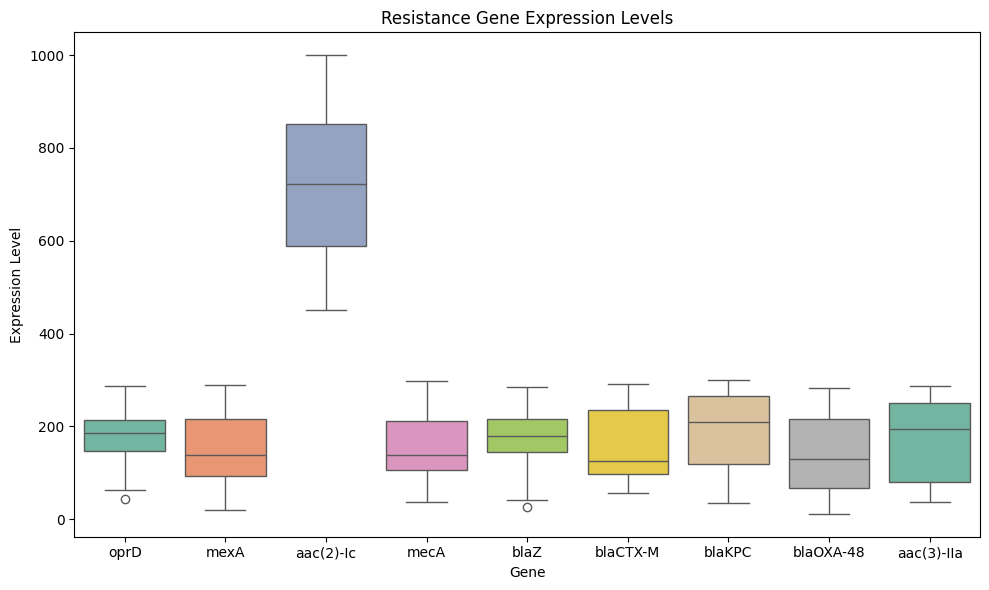

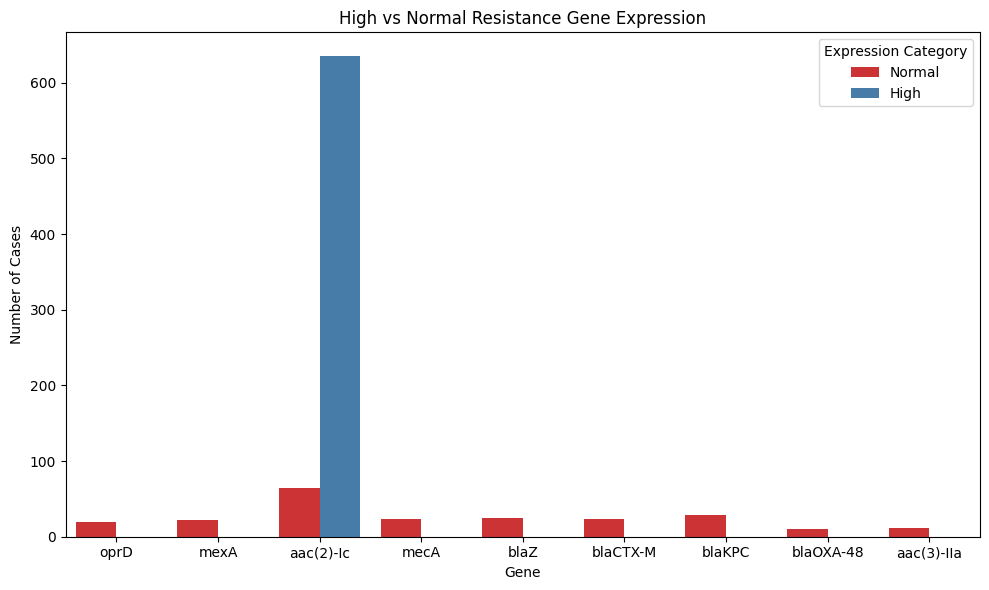

In [8]:
# ------------------ PLOT 1: Expression Level Boxplot ------------------
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Gene', hue = 'Gene', y = 'Expression Level', data = Gene_Expression, palette = 'Set2')
plt.title('Resistance Gene Expression Levels')
plt.tight_layout()
plt.show()

# ------------------ PLOT 2: High vs Normal Expression Counts ------------------
plt.figure(figsize=(10, 6))
sns.countplot(x = 'Gene', hue = 'Expression Category', data = Gene_Expression, palette = 'Set1')
plt.ylabel('Number of Cases')
plt.title('High vs Normal Resistance Gene Expression')
plt.tight_layout()
plt.show()

WOW! There seems to be a very high expressin level compared to normal expression! Lets now see if there are any correlations with clinical data. Let try to add relevent clinical data to the gene expression dataframe and see what the results are. 

How should we go about this? 
When it comes to data, what would we data point could we use to merge the data together between the two data sets.
Both have ``Patient ID`` 

In [9]:
Relevent_Clinical = Clinical_Data[['Patient ID', 'Unit', 'Outcome', 'Diagnosis']]

Expression_w_Clinical = Gene_Expression.merge(Relevent_Clinical, on = 'Patient ID', how = 'left')
display(Expression_w_Clinical)

,Patient ID,Collection Date,Strain,Gene,Expression Level,Expression Category,Unit,Outcome,Diagnosis
0,2200,2025-06-10,Pseudomonas aeruginosa,oprD,240.94,Normal,PCU,Recovered,Infection - Pseudomonas aeruginosa
1,2200,2025-06-10,Pseudomonas aeruginosa,mexA,181.51,Normal,PCU,Recovered,Infection - Pseudomonas aeruginosa
2,2201,2025-05-04,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,776.74,High,ED,Deceased,Drug-resistant TB
3,2202,2025-01-31,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,944.52,High,PCU,Deceased,Drug-resistant TB
4,2203,2025-07-18,Methicillin-Resistant Staphylococcus aureus,mecA,37.41,Normal,ICU-2,Recovered,Infection - Methicillin-Resistant Staphylococc...
...,...,...,...,...,...,...,...,...,...
859,2995,2025-04-29,Methicillin-Resistant Staphylococcus aureus,blaZ,239.10,Normal,ICU-1,Recovered,Infection - Methicillin-Resistant Staphylococc...
860,2996,2025-05-06,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,769.94,High,ICU-1,Deceased,Drug-resistant TB
861,2997,2025-06-06,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,715.80,High,Med-Surg,Deceased,Drug-resistant TB
862,2998,2025-04-16,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,550.20,High,ICU-3,Recovered,Drug-resistant TB


,Gene,Average Expression
0,oprD,173.398000
1,mexA,152.904545
2,aac(2)-Ic,721.963286
3,mecA,149.615000
4,blaZ,173.726800
5,blaCTX-M,152.156087
6,blaKPC,188.666897
7,blaOXA-48,139.777000
8,aac(3)-IIa,170.042727


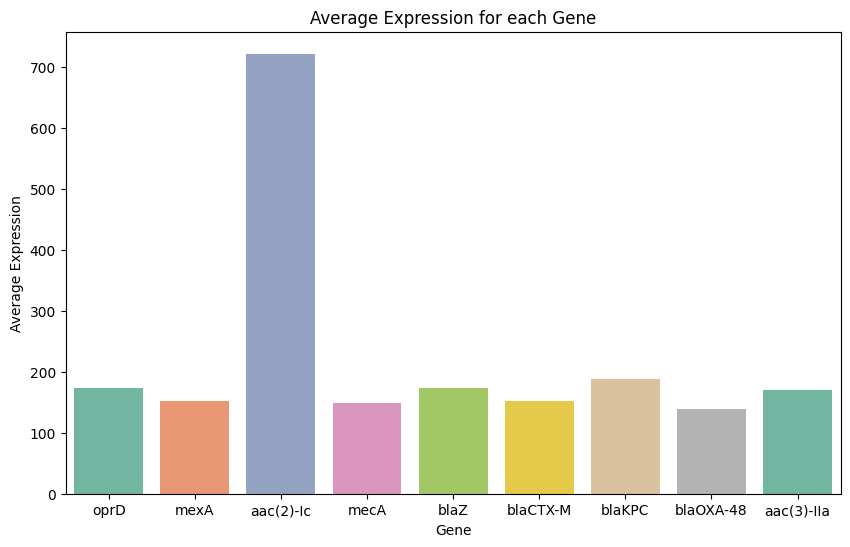

In [10]:
from collections import defaultdict
import matplotlib.pyplot as plt

def Mean_Expression(Values):
    Mean = sum(Values) / len(Values)
    return Mean

Expression = defaultdict(list)

for i, Row in Expression_w_Clinical.iterrows():
    Gene = Row['Gene']
    Level = Row['Expression Level']
    Expression[Gene].append(Level)
    Avg_Expression = {Gene: Mean_Expression(Levels) for Gene, Levels in Expression.items()}
    Avg_Expression_DF = pd.DataFrame(list(Avg_Expression.items()), columns = ['Gene', 'Average Expression'])

display(Avg_Expression_DF)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'Gene', y = 'Average Expression', data = Avg_Expression_DF,  hue = 'Gene', palette = 'Set2')
plt.title('Average Expression for each Gene')
plt.ylabel('Average Expression')
plt.xlabel('Gene')
plt.show()

plt.figure(figsize = (10, 6))
plt.bar(x = 'Gene', height = 'Average Expression', data = Avg_Expression_DF)
plt.title('Average Expression for each Gene')
plt.ylabel('Average Expression')
plt.xlabel('Gene')
plt.show()

,Unit,Average Expression
0,PCU,660.014954
1,ED,611.284627
2,ICU-2,589.958295
3,ICU-1,600.241466
4,ICU-3,627.741705
5,CCU,609.235078
6,Med-Surg,620.437731


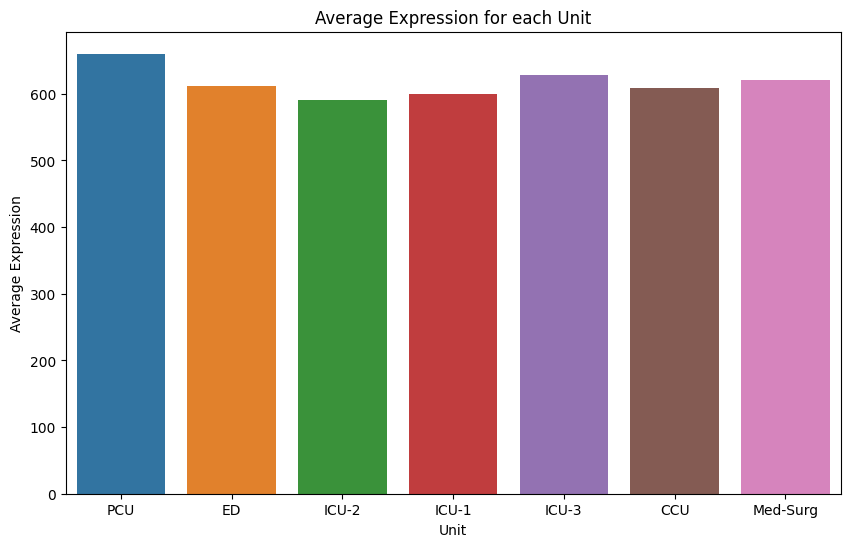

In [11]:
Expression = defaultdict(list)

for i, Row in Expression_w_Clinical.iterrows():
    Unit = Row['Unit']
    Level = Row['Expression Level']
    Expression[Unit].append(Level)
    Avg_Expression = {Unit: Mean_Expression(Levels) for Unit, Levels in Expression.items()}
    Avg_Expression_DF = pd.DataFrame(list(Avg_Expression.items()), columns = ['Unit', 'Average Expression'])

display(Avg_Expression_DF)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'Unit', y = 'Average Expression', data = Avg_Expression_DF,  hue = 'Unit')
plt.title('Average Expression for each Unit')
plt.ylabel('Average Expression')
plt.xlabel('Unit')
plt.show()

In [12]:
Pathogen_to_Gene = defaultdict(set)

for i, Row in Expression_w_Clinical.iterrows():
    Pathogen = Row['Strain']
    Gene = Row['Gene']
    Pathogen_to_Gene[Pathogen].add(Gene)

Pathogen_Gene_Map = pd.DataFrame([
    {'Pathgogen': Pathogen, 'Genes': Genes} for Pathogen, Genes in Pathogen_to_Gene.items()
])

display(Pathogen_Gene_Map)

,Pathgogen,Genes
0,Pseudomonas aeruginosa,"{oprD, mexA, blaKPC, blaCTX-M}"
1,Mycobacterium tuberculosis var. bovis AF2122/97,{aac(2)-Ic}
2,Methicillin-Resistant Staphylococcus aureus,"{mecA, blaZ}"
3,Klebsiella pneumoniae,"{blaCTX-M, mecA, blaZ, blaKPC, blaOXA-48}"
4,Escherichia coli,"{blaCTX-M, aac(3)-IIa, mecA, blaZ, blaKPC}"


In [13]:
from sklearn.preprocessing import LabelEncoder

encoded_df = Expression_w_Clinical.copy()
for col in ['Outcome', 'Diagnosis', 'Unit']:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))

# Compute correlations
correlation_matrix = encoded_df[['Outcome', 'Diagnosis', 'Unit']].corr()
print(correlation_matrix)

            Outcome  Diagnosis      Unit
Outcome    1.000000   0.424647  0.022824
Diagnosis  0.424647   1.000000 -0.038130
Unit       0.022824  -0.038130  1.000000


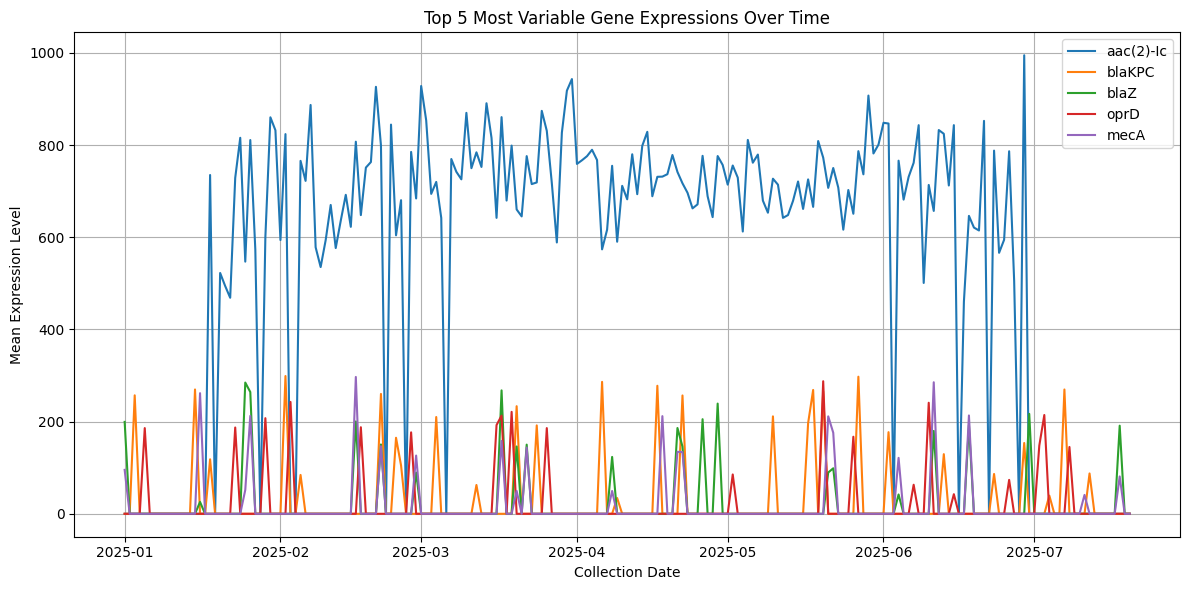

In [14]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define mean expression helper
def Mean_Expression(values):
    return sum(values) / len(values) if values else 0

# Step 1: Organize expression levels by gene and date
Expression_by_Time = defaultdict(lambda: defaultdict(list))

for _, row in Expression_w_Clinical.iterrows():
    date = row['Collection Date']
    expression = row['Expression Level']
    gene = row['Gene']
    Expression_by_Time[gene][date].append(expression)

# Step 2: Compute mean expression per gene per date
Gene_Time_Avg = {
    gene: {date: Mean_Expression(levels) for date, levels in date_map.items()}
    for gene, date_map in Expression_by_Time.items()
}

# Step 3: Convert to DataFrame and sort by date
Timeline_DF = pd.DataFrame(Gene_Time_Avg)

# Step 4: Fill missing dates from 2025-01-01 to 200 days later
start_date = datetime(2025, 1, 1)
end_date = start_date + timedelta(days=200)
full_range = pd.date_range(start=start_date, end=end_date)

# Reindex to include all dates and fill NaNs with 0
Timeline_DF = Timeline_DF.reindex(full_range).fillna(0)

# Step 5: Plot top 5 most variable genes
Top_Genes = Timeline_DF.std().sort_values(ascending=False).head(5).index

plt.figure(figsize=(12, 6))
for gene in Top_Genes:
    plt.plot(Timeline_DF.index, Timeline_DF[gene], label=gene)

plt.title("Top 5 Most Variable Gene Expressions Over Time")
plt.xlabel("Collection Date")
plt.ylabel("Mean Expression Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

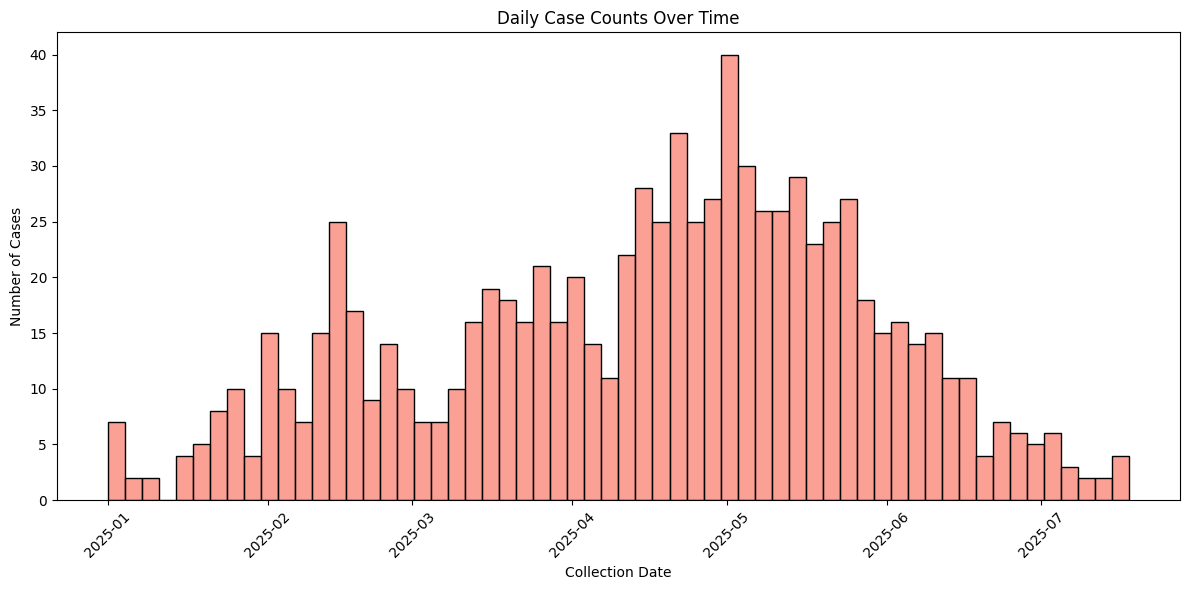

In [15]:
# Plot
plt.figure(figsize=(12, 6))
sns.histplot(Expression_w_Clinical['Collection Date'], bins=60, kde=False, color='salmon')
plt.title('Daily Case Counts Over Time')
plt.xlabel('Collection Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


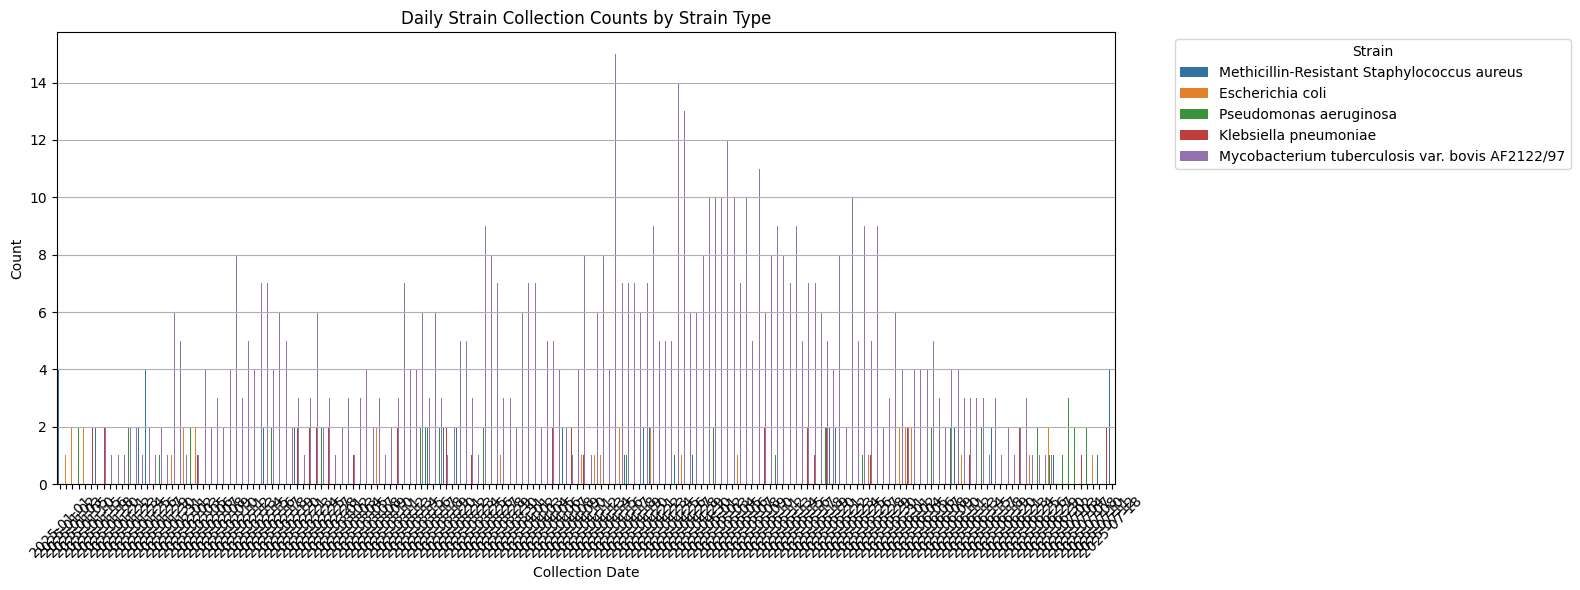

In [20]:
# Group by date and strain
Strain_By_Date = Expression_w_Clinical.groupby(['Collection Date', 'Strain']).size().reset_index(name='Count')

# Plot using seaborn with hue for strain type
plt.figure(figsize=(16, 6))
sns.barplot(data=Strain_By_Date, x='Collection Date', y='Count', hue='Strain')

plt.title("Daily Strain Collection Counts by Strain Type")
plt.xlabel("Collection Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Strain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()